In [3]:
# Exercise 1: Concatenate

import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

df2 = pd.DataFrame([['c', 1], ['d', 2]],
                   columns=['letter', 'number'])

result = pd.concat([df1, df2], axis = 0).reset_index(drop = True)
print(result)


  letter  number
0      a       1
1      b       2
0      c       1
1      d       2


In [5]:
# Exercise 2: Merge

import pandas as pd

#df1

df1_dict = {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']}

df1 = pd.DataFrame(df1_dict, columns = ['id', 'Feature1', 'Feature2'])

#df2
df2_dict = {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']}

df2 = pd.DataFrame(df2_dict, columns = ['id', 'Feature1', 'Feature2'])


result_inner = pd.merge(df1, df2, on = "id", how = "inner", )

print(result_inner)

print()
result_outer = pd.merge(df1, df2, on = "id", how = "outer")
print("outer datframe is : \n", result_outer)


  id Feature1_x Feature2_x Feature1_y Feature2_y
0  1          A          B          K          L
1  2          C          D          M          N

outer datframe is : 
   id Feature1_x Feature2_x Feature1_y Feature2_y
0  1          A          B          K          L
1  2          C          D          M          N
2  3          E          F        NaN        NaN
3  4          G          H        NaN        NaN
4  5          I          J        NaN        NaN
5  6        NaN        NaN          O          P
6  7        NaN        NaN          Q          R
7  8        NaN        NaN          S          T


In [8]:
# Exercise 3: Merge MultiIndex

import numpy as np
import pandas as pd

#generate days
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

#generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

#create indexs
index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,
                        data=np.random.randn(len(index), 3),
                        columns=['Open','Close','Close_Adjusted'])

alternative_data = pd.DataFrame(index=index_alt,
                                data=np.random.randn(len(index_alt), 2),
                                columns=['Twitter','Reddit'])


merged = market_data.merge(alternative_data,
                           left_index=True,
                           right_index=True,
                           how='left')

merged = merged.fillna(0)

print(merged)


                       Open     Close  Close_Adjusted   Twitter    Reddit
Date       Ticker                                                        
2021-01-01 AAPL    0.409193 -0.589224       -0.642642  0.286434  2.266792
           FB     -0.114159  0.775123       -0.570432  1.385236 -1.560074
           GE      0.791457 -2.000565        0.625752 -0.106786 -1.784287
           AMZN   -0.171184  1.041708        0.418728  1.371947  0.457934
           DAI     1.361536 -0.402003       -0.168725 -0.409256  0.299649
...                     ...       ...             ...       ...       ...
2021-12-31 AAPL   -0.161387 -0.560098       -0.767223  0.000000  0.000000
           FB     -0.044848 -0.220858       -0.823823  0.000000  0.000000
           GE      0.311325 -2.178249        0.949349  0.000000  0.000000
           AMZN   -1.766370 -1.068330       -0.703855  0.000000  0.000000
           DAI    -1.549737  0.294483       -2.363337  0.000000  0.000000

[1305 rows x 5 columns]


In [14]:
import numpy as np
import pandas as pd

def winsorize(df, quantiles):
    lower = np.percentile(df, quantiles[0]*100)
    upper = np.percentile(df, quantiles[1]*100)
    return df.clip(lower=lower, upper=upper)

df = pd.DataFrame(range(1,11), columns=['sequence'])
print(winsorize(df, [0.20, 0.80]))

groups = np.concatenate([
    np.ones(10),
    np.ones(10)+1,
    np.ones(10)+2,
    np.ones(10)+3,
    np.ones(10)+4
])

df = pd.DataFrame(
    data=zip(groups, range(1,51)),
    columns=['group','sequence']
)

df['sequence'] = df.groupby('group')['sequence'].transform(lambda x: winsorize(x,[0.05,0.95]))
print()
print(df.head(11))


   sequence
0       2.8
1       2.8
2       3.0
3       4.0
4       5.0
5       6.0
6       7.0
7       8.0
8       8.2
9       8.2

    group  sequence
0     1.0      1.45
1     1.0      2.00
2     1.0      3.00
3     1.0      4.00
4     1.0      5.00
5     1.0      6.00
6     1.0      7.00
7     1.0      8.00
8     1.0      9.00
9     1.0      9.55
10    2.0     11.45


In [25]:
# Exercise 5: Groupby Agg

import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
})

# Group by 'product' and compute min, max, mean
# result = df.groupby('product')['value'].agg(['min', 'max', 'mean'])
result = df.groupby('product')['value'].agg(min='min', max='max', mean='mean')
print(result)


                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220


Original DataFrame (first 10 rows):
                   Prediction
Date       Ticker            
2021-01-01 AAPL      0.496714
           FB       -0.138264
           GE        0.647689
           AMZN      1.523030
           DAI      -0.234153
2021-01-04 AAPL     -0.234137
           FB        1.579213
           GE        0.767435
           AMZN     -0.469474
           DAI       0.542560

Shape: (1305, 1)
Index levels: ['Date', 'Ticker']


Unstacked DataFrame (first 3 rows):
           Prediction                                        
Ticker           AAPL      AMZN       DAI        FB        GE
Date                                                         
2021-01-01   0.496714  1.523030 -0.234153 -0.138264  0.647689
2021-01-04  -0.234137 -0.469474  0.542560  1.579213  0.767435
2021-01-05  -0.463418 -1.913280 -1.724918 -0.465730  0.241962

Shape after unstacking: (261, 5)


<Figure size 1400x700 with 0 Axes>

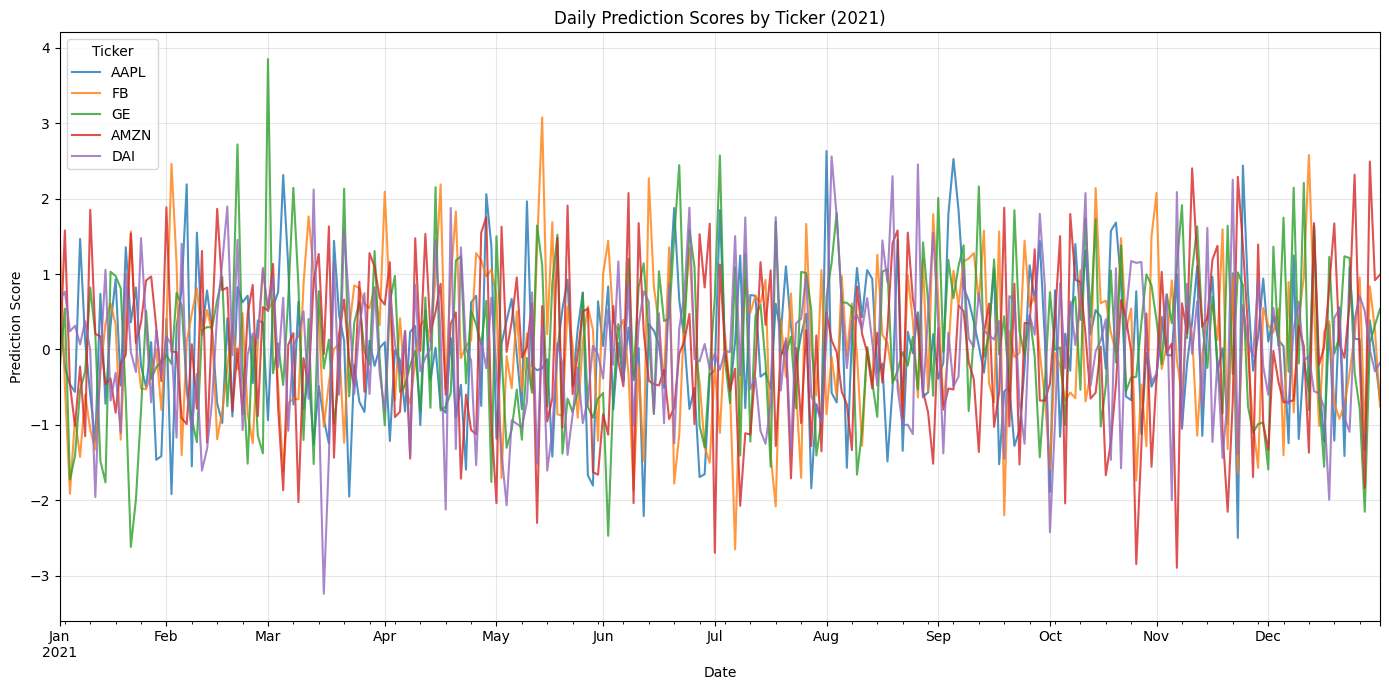

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate business dates
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

# Generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

# Create MultiIndex
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# Create DataFrame with random predictions
market_data = pd.DataFrame(index=index,
                          data=np.random.randn(len(index), 1),
                          columns=['Prediction'])

print("Original DataFrame (first 10 rows):")
print(market_data.head(10))
print(f"\nShape: {market_data.shape}")
print(f"Index levels: {market_data.index.names}")

# 1. Unstack the DataFrame
market_data_unstacked = market_data.unstack(level='Ticker')

print("\n" + "="*80)
print("\nUnstacked DataFrame (first 3 rows):")
print(market_data_unstacked.head(3))
print(f"\nShape after unstacking: {market_data_unstacked.shape}")

# 2. Plot the 5 time series using Pandas built-in plot
plt.figure(figsize=(14, 7))

# Plot all columns (time series for each ticker)
market_data_unstacked.plot(figsize=(14, 7), 
                           title='Daily Prediction Scores by Ticker (2021)',
                           xlabel='Date',
                           ylabel='Prediction Score',
                           linewidth=1.5,
                           alpha=0.8)

# Flatten the column MultiIndex for cleaner legend
ax = plt.gca()
ax.legend([ticker for ticker in tickers], 
          title='Ticker', 
          loc='best')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()